# Probabilistic Graphical Models

MVA 2021-2022

Elías Masquil (eliasmasquil@gmail.com)

Nicolás Violante (nviolante96@gmail.com)


**Misc functions**

In [64]:
!pip install pyreadr

In [65]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pyreadr
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Colab utility for uploading the data
uploaded = files.upload()

# Helper function for loading into memory the datasets to be used
def load_dataset(path):
    data = []
    labels = []
    for line in open(path, 'r').readlines():
        point = np.array([float(line.split(' ')[0]), float(line.split(' ')[1])]) 
        label = int(line.split(' ')[2][1])
        data.append(point)
        labels.append(label)

    return np.array(data), np.array(labels)

# Linear classification data
data_trainA, labels_trainA = load_dataset('./trainA')
data_testA, labels_testA = load_dataset('./testA')
data_trainB, labels_trainB = load_dataset('./trainB')
data_testB, labels_testB = load_dataset('./testB')
data_trainC, labels_trainC = load_dataset('./trainC')
data_testC, labels_testC = load_dataset('./testC')
# Gaussian mixture data
raw_decathlon = pyreadr.read_r('./decathlon.RData')['X']
decathlon_data = np.array(raw_decathlon)

Saving decathlon.RData to decathlon (1).RData
Saving testA to testA (1)
Saving testB to testB (1)
Saving testC to testC (1)
Saving trainA to trainA (1)
Saving trainB to trainB (1)
Saving trainC to trainC (1)


# 1. Linear Classification

## 1.1 Generative Model (LDA)

a) Derive the form of the maximum likelihood estimator for this model.

The log-likelihood can be written:

\begin{align} 
L_{(x_1,y_1),\dots,(x_n, y_n)}(\theta,\mu_0, \mu_1, \Sigma)
                               &= \log p((x_1,y_1),\dots,(x_n,y_n)) \\ 
                               &= \log \prod_{i=1}^{n} p(x_i|y_i)p(y_i) \\
                               &= \sum_{i=1}^{n} \log p(x_i|y_i)p(y_i) \\
\end{align}

$$ L_{(x_1,y_1),\dots,(x_n, y_n)}= \sum_{i=1}^{n}\left(-\frac{d}{2}\log(2\pi)^{} -\frac{1}{2}\log\det(\Sigma)-\frac{1}{2}(x_i-\mu_{y_i})^T\Sigma^{-1}(x_i-\mu_{y_i}) + y_i\log\theta +(y_i-1)\log(1-\theta) \right)$$

- Set $\frac{\partial L}{\partial \theta} =0$:

 This derivative is $\frac{1}{\theta} \sum_{i=1}^n y_i - \frac{1}{1-\theta}\sum_{i=1}^n(1-y_i) =0$ from which we get $\theta \sum_{i=1}^n (1-y_i)= (1-\theta) \sum_{i=1}^n y_i$. If we expand this term we obtain $\theta \sum_{i=1}^n 1 -\theta \sum_{i=1}^ny_i = \sum_{i=1}^n y_i -\theta \sum_{i=1}^ny_i$. Therefore, the MLE is 

 $$ \hat{\theta} = \frac{1}{n}\sum_{i=1}^ny_i $$


 - Set $\frac{\partial L}{\partial \mu_0} =0$:

 Since $\sum_{i=1/y_i=0}^n \Sigma^{-1}(x_i - \mu_{y_i})= \Sigma^{-1}\sum_{i=1/y_i=0}^n(x_i - \mu_{y_i}) = 0$
 and $\Sigma$ is invertible, we have that $$\hat{\mu_0} = \frac{1}{N_0} \sum_{i=1/y_i=0}^nx_i$$ 
 
 Analogously we get $$\hat{\mu_1} = \frac{1}{N_1} \sum_{i=1/y_i=1}^nx_i$$ Where $N_i$ is the number of labels equal to $i$.

 
 - Set  $\frac{\partial L}{\partial \Sigma^{-1}} = 0$:
\begin{align}
L &\propto -\frac{n}{2}\log\det(\Sigma) -\frac{1}{2}\sum_{i=1}^n(x_i-\mu_{y_i})^T\Sigma^{-1}(x_i-\mu_{y_i}) \\
  &\propto -\frac{n}{2}\log\det(\Sigma) -\frac{1}{2}\sum_{i=1}^nTr\left((x_i-\mu_{y_i})^T\Sigma^{-1}(x_i-\mu_{y_i})\right) \\
  &\propto -\frac{n}{2}\log\det(\Sigma) -\frac{1}{2}\sum_{i=1}^nTr\left(\Sigma^{-1}(x_i-\mu_{y_i})(x_i-\mu_{y_i})^T\right) \\
  &\propto -\frac{n}{2}\log\det(\Sigma) -\frac{1}{2}Tr\left(\Sigma^{-1}\sum_{i=1}^n(x_i-\mu_{y_i})(x_i-\mu_{y_i})^T\right) \\
\end{align}

Now we use the properties $\frac{d}{dA}Tr(AB) = B^T$ and $\frac{d}{dA}\log\det(A) = A^{-T}$

By setting the derivative $\frac{\partial L}{\partial \Sigma^{-1}} = 0$ we get 
$-\frac{n}{2}\Sigma
-\frac{1}{2}\sum_{i=1}^n(x_i - \mu_{y_i})(x_i - \mu_{y_i})^T  = 0$

Then $\Sigma = \frac{1}{n}\sum_{i=1}^n(x_i - \mu_{y_i})(x_i - \mu_{y_i})^T$ and substituting with the estimators of $\mu_i$ we obtain

 $$\hat{\Sigma}= \frac{1}{n}\sum_{i=1}^n \left((1-y_i)(x_i-\hat{\mu_0})(x_i-\hat{\mu_0})^T + y_i(x_i-\hat{\mu_1})(x_i-\hat{\mu_1})^T\right)$$


 b. What is the form of the conditional distribution $p(y = 1|x)$? Compare with the form of logistic regression.

 Using Bayes' Theorem $p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}$ where $p(x) = p(x|y=1)p(y=1) + p(x|y=0)p(y=0)$. Therefore we can write

 $$p(y=1|x) = 
\frac{\theta e^{-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)}
}
{\theta e^{-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)} + (1-\theta)e^{-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)}
}$$

Note that we have simplified the terms $\frac{1}{(2\pi)^{d/2}\det(\Sigma)^2}$

Moreover, the exponent can be simplified as follows:

$$-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0) +\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1) = -x^T\Sigma^{-1}(\mu_1-\mu_0) - \frac{\mu_0^T\Sigma^{-1}\mu_0 -\mu_1^T\Sigma^{-1}\mu_1}{2} $$


Putting everything together we get

$$p(y=1|x) = 
\frac{1
}
{1 + e^{-x^T\Sigma^{-1}(\mu_1-\mu_0) - \frac{\mu_0^T\Sigma^{-1}\mu_0 -\mu_1^T\Sigma^{-1}\mu_1}{2} +\log\frac{1-\theta}{\theta}}
}$$

From this last expression we recognize a logistic function of the form $p(y=1|x) = \frac{1}{1+e^{-(x^Ta + b)}}$ with parameters $a = \Sigma^{-1}(\mu_1-\mu_0)$ and $b =  \frac{\mu_0^T\Sigma^{-1}\mu_0 -\mu_1^T\Sigma^{-1}\mu_1}{2} -\log\frac{1-\theta}{\theta}$


In [66]:
class LDA:
    def __init__(self):
        self.params = dict()

    def train(self, data, labels):
        # MLE parameters
        dim = data.shape[1]
        theta = np.mean(labels)
        mu0 = np.sum(data[labels==0], axis=0) / np.sum(labels==0)
        mu1 = np.sum(data[labels==1], axis=0) / np.sum(labels==1)
        sigma = np.zeros((dim,dim))
        for i in range(data.shape[0]):
            if labels[i]==0:
                sigma += (data[i]- mu0)[:, None]@(data[i]- mu0)[:, None].T
            elif labels[i]==1:
                sigma += (data[i]- mu1)[:, None]@(data[i]- mu1)[:, None].T
        sigma /= data.shape[0]
        sigma_inv = np.linalg.inv(sigma)
        self.a = sigma_inv@(mu1 - mu0)
        self.b = (mu0[:, None].T@sigma_inv@mu0[:, None] - mu1[:, None].T@sigma_inv@mu1[:, None]) / 2 
        self.b -= np.log((1 - theta) / theta) 
        self.params['theta'] = theta
        self.params['mu0'] = mu0
        self.params['mu1'] = mu1
        self.params['sigma'] = sigma
        self.params['a'] = self.a
        self.params['b'] = self.b

    def predict(self, data):
        """ Returns the probability of label=1 given the data points """
        return 1 / (1 + np.exp(-(np.matmul(self.a, data.T) + self.b)))
        
    def score(self, data, labels):
        """ Returns percentage of misclassified points """
        preds = self.predict(data)
        preds[preds >= 0.5] = 1
        preds[preds < 0.5] = 0 
        preds = np.squeeze(preds)
        score = 100 * np.sum(preds != labels) / labels.size
        return score

    def plot_predictions(self, data, labels):

        x_min = data[:,0].min()
        x_max = data[:,0].max()
        x = np.linspace(x_min, x_max)
        y = (- x * self.a[0] - self.b) / self.a[1]
        y = np.squeeze(y)
        return x, y


## 1.2 Logistic Regression

In [67]:
class LogisticRegression:
    def __init__(self):
        self.params = dict()

    @staticmethod
    def __sigmoid__(x):
      return 1/(1+np.exp(-x))

    @staticmethod
    def __compute_phi__(x):
      """
      Adding last coordinate of 1
      """
      return np.hstack((x, np.ones((x.shape[0], 1), dtype=x.dtype)))

    def train(self, data, labels, epsilon=1e-6):
      """
      Train model using Newton's Method
      (using notation from Bishop's book)
      """
      w = np.zeros([data.shape[1]+1, 1])
      self.params['w'] = w
      i = 0
      phi = self.__compute_phi__(data)
      decrement = np.inf
      while decrement > epsilon:
        i+=1
        w_old = self.params['w']
        y = self.__sigmoid__(phi@w_old)
        t = labels[:, None]
        gradient = phi.T@(y-t)
        R = np.eye(N=data.shape[0], M=data.shape[0]) * y[:,0] * (1-y)[:,0]
        hessian = phi.T@R@phi
        inverse_hessian = np.linalg.inv(hessian)
        w_new = w_old  - inverse_hessian @ gradient
        # Update weights
        self.params['w'] = w_new
        # Newton decrement and loss
        decrement = gradient.T@inverse_hessian@gradient
        loss = (t.T@ (np.log(y) - np.log(1-y)) + np.sum(np.log(1-y))) * -1

    def predict(self, data):
        """
        Returns the probability of label=1 given the data points
        """
        phi = self.__compute_phi__(data)
        return self.__sigmoid__(phi@self.params['w'])
        
    def score(self, data, labels):
        preds = self.predict(data)
        preds[preds >= 0.5] = 1
        preds[preds < 0.5] = 0 
        preds = np.squeeze(preds)
        score = 100 * np.sum(preds != labels) / labels.size
        return score

    def plot_predictions(self, data, labels):
        x_min = data[:,0].min()
        x_max = data[:,0].max()
        w = self.params['w']
        x = np.linspace(x_min, x_max)
        y = (- x * w[0] - w[2] + 0.5) / w[1]
        y = np.squeeze(y)
        return x, y


## 1.3 Linear Regression

In [68]:
class LinearRegression:
    def __init__(self):
        self.params = dict()

    def train(self, data, labels):
        # MLE parameters
        num_samples = data.shape[0]
        num_features = data.shape[1]
        data = np.hstack((data, np.ones((num_samples,1))))
        self.beta = np.linalg.inv(data.T@data)@data.T@labels[:,None]
        # MLE for simga^2 (see Bishop section 3.1.1)
        error = labels - data@self.beta[:,0]
        self.sigma2 = np.dot(error, error) / (num_samples)
        self.params['beta'] = self.beta
        self.params['sigma2'] = self.sigma2
        

    def predict(self, data):
        """ Returns the probability of label=1 given the data points """
        num_samples = data.shape[0]
        data = np.hstack((data, np.ones((num_samples,1))))
        return data@self.beta
        
    def score(self, data, labels):
        """ Returns percentage of misclassified points """
        preds = self.predict(data)
        preds[preds >= 0.5] = 1
        preds[preds < 0.5] = 0 
        preds = np.squeeze(preds)
        score = 100 * np.sum(preds != labels) / labels.size
        return score

    def plot_predictions(self, data, labels):
        x_min = data[:,0].min()
        x_max = data[:,0].max()
        x = np.linspace(x_min, x_max)
        y = (- x * self.beta[0] - self. beta[2] + 0.5) / self.beta[1]
        y = np.squeeze(y)
        return x, y


## 1.4 Application

We compute the misclassification error for each model on every dataset, both train and test, and also give the value of the parameters learnt in each case. In addition, plots in each case are given for the purpuse of visualization.

For all models the error increaseas from dataset A to dataset C. This can be explained by the fact that each dataset is "harder" in the following sense. Dataset A is linearly separable, so it should be fairly easy to learn a classification rule. Next, dataset B is not separable but only because of a few points near the decision boundary. Finally, dataset C is the hardset since the underlying distribution of the data is clearly not linearly separable. 

In all cases the error is bigger in the test set than in the train set. However the gap between the two is not big; the predictions on the test set are good as well. However, Logistic Regression overfits more than the other models. This behaviour is particularly clear on Dataset C, where there are some purple points on the bottom-right side of the image and the decision boundary is tight to those points. Because of this, some of the yellow points are misclassified when predicting on the test set. Note that even though Logistic Regression and LDA have the same functional form for the posterior probablity, the final result is not the same due to the way in which their parameters are computed (the optimization targets are different). In the first case we find a closed form for the parameters by maximizing the joint log-likelihood of $(x,y)$ while in the second we assume that the posterior is well modeled by a Logistic function and then optimize its parameters using IRLS.

Another important observation is that we obtain the same results with LDA and Linear Regression: the decision boundary is the same in every dataset and, of course, the misclassification error is also the same. This is expected as both methods are linear discriminant algorithms and it can be shown that indeed define the same decision rule in the binary case. See page 130 of [An Introduction to Statistical Learning](https://www.statlearning.com)

However, LDA may have an advantage over Linear Regression in the sense that it offers a generative model that intuitvely explains the data. In addition, we can sample new points from the learnt distribution. 
The value of the cluster weights in LDA are of order $\sim 0.40$, which corresponds to balanced datasets, as seen in the figures. For Linear Regression, since we are using a fully statistical approach, we can get as a by-product an estimation of the noise $\sigma^2$.

----
In the following section all the numerical results for the parameters, the error rates, and the plots can be found.

The following table is a summary of the results over the three test sets. LDA and Linear Regression are the best models on dataset C. On dataset B, Logistic Regression is the best. Finally, on the linearly separable dataset A, all methods achieve the same results.

| Test Errors         | Dataset A | Dataset B | Dataset C |
|---------------------|-----------|-----------|-----------|
| LDA                 | 1.0%      | 4.5%      | 4.0%      |
| Logistic Regression | 1.0%      | 3.5%      | 4.7%      |
| Linear Regression   | 1.0%      | 4.5%      | 4.0%      |

A possible explanaiton for the best  model in dataset B might be that since Logistic Regression finds a tighter decision boundary (to the purple points), achieves better results because both classes are really close to each other. On the other hand, for dataset C, this same property causes Logistic Regression to slightly overfit the data, making it the worst algorithm out of the three. 


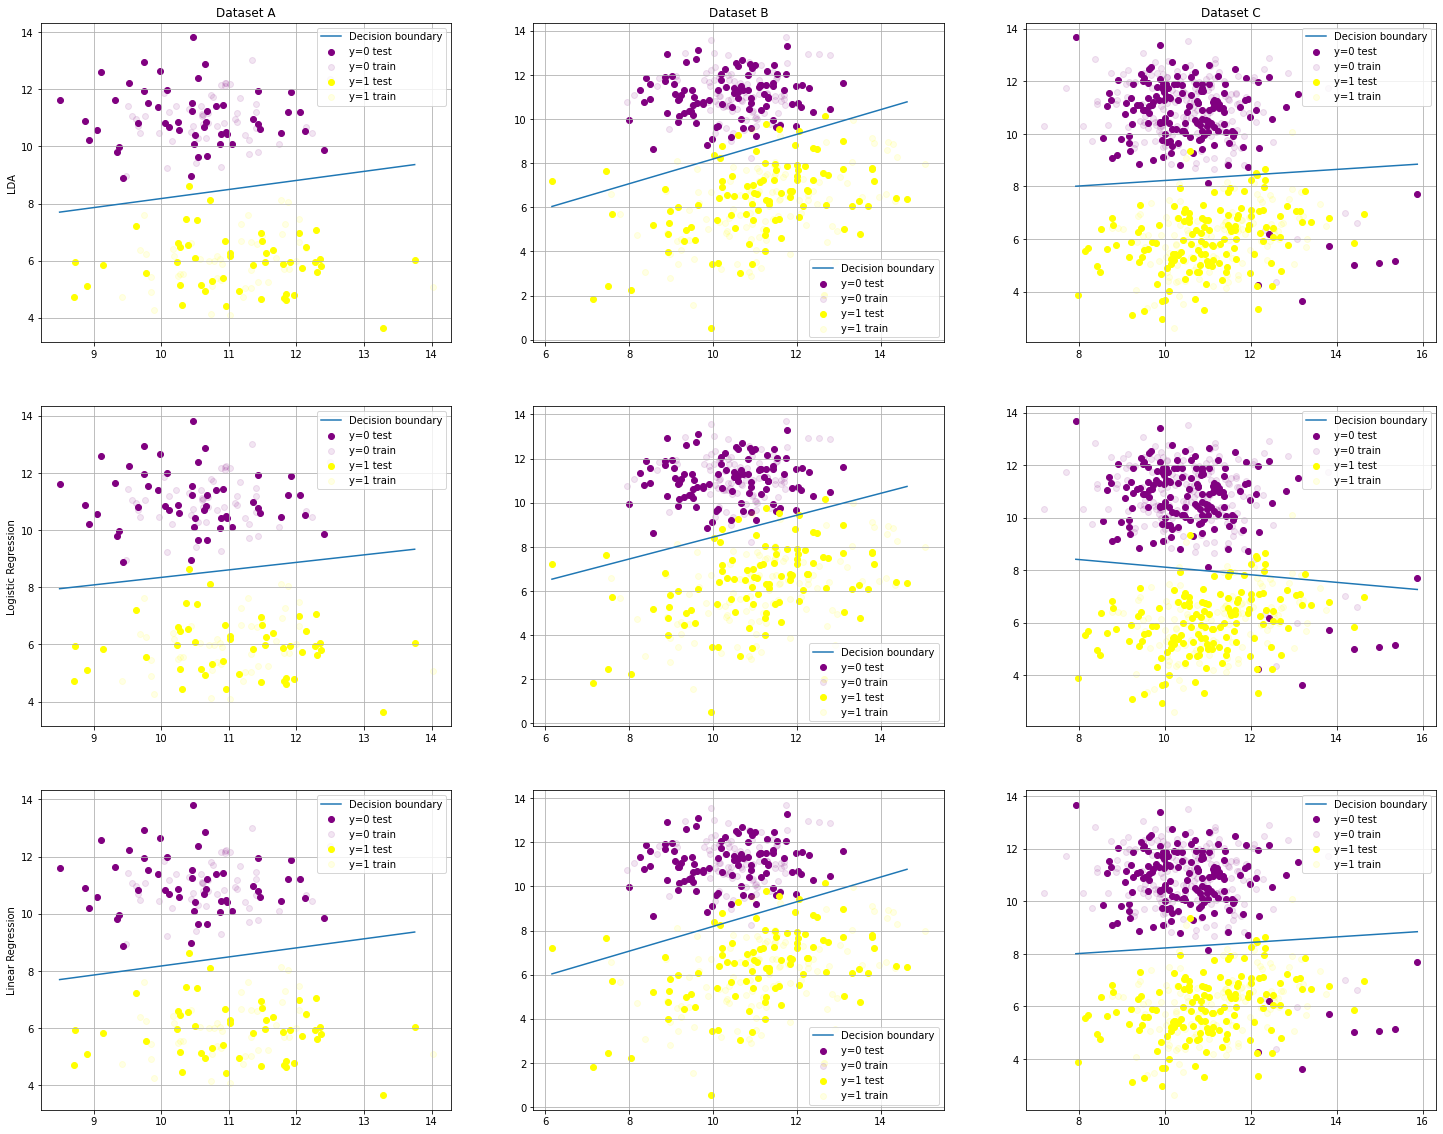

In [69]:
# Plot results for each model in all the datasets
models = [LDA, LogisticRegression, LinearRegression]
model_names = ['LDA', 'Logistic Regression', 'Linear Regression']
datasets = [(data_trainA, data_testA, labels_trainA, labels_testA), 
            (data_trainB, data_testB, labels_trainB, labels_testB),
            (data_trainC, data_testC, labels_trainC, labels_testC)]
dataset_names = ['Dataset A', 'Dataset B', 'Dataset C']

plt.figure(figsize=(25, 20))

for i, model_class in enumerate(models):
    for j, (data_train, data_test, labels_train, labels_test) in enumerate(datasets):
        model = model_class()
        model.train(data_train, labels_train)
        x, y = model.plot_predictions(data_test, labels_test)
        plt.subplot(3, 3, 3*i+j+1)

        plt.scatter(data_test[np.where(labels_test == 0)[0],0], data_test[np.where(labels_test == 0)[0],1], 
                    label='y=0 test', c='purple')
        plt.scatter(data_train[np.where(labels_train == 0)[0],0], data_train[np.where(labels_train == 0)[0],1], 
                    label='y=0 train', c='purple', alpha=0.1)
        plt.scatter(data_test[np.where(labels_test == 1)[0],0], data_test[np.where(labels_test == 1)[0],1], 
                    label='y=1 test', c='yellow')
        plt.scatter(data_train[np.where(labels_train == 1)[0],0], data_train[np.where(labels_train == 1)[0],1], 
                    label='y=1 train', c='yellow', alpha=0.1)

        plt.plot(x,y, label='Decision boundary')
        plt.legend()
        plt.grid()
        if j == 0:
            ylabel = model_names[i]
            plt.ylabel(ylabel)
        if i == 0:
            title = dataset_names[j]
            plt.title(title)

plt.show()




In [70]:
# Evaluate missclasification error and parameters
def evaluate_model(model, data_train, labels_train, data_test, labels_test):
    model.train(data_train, labels_train)
    print(f'Train error {model.score(data_train, labels_train)}%')
    print(f'Test error {model.score(data_test, labels_test)}%')
    print(f'Model parameters:')
    for param, value in model.params.items():
        print(f'   {param}: {value}')
    print('')

for i, model_class in enumerate(models):
    for j, (data_train, data_test, labels_train, labels_test) in enumerate(datasets):
        model = model_class()
        print(f"Results for {model_names[i]} in {dataset_names[j]}")
        evaluate_model(model, data_train, labels_train, data_test, labels_test)
    print('---------------------------------------------------------------------')


Results for LDA in Dataset A
Train error 0.0%
Test error 1.0%
Model parameters:
   theta: 0.48
   mu0: [10.73248858 10.93983367]
   mu1: [11.03264581  5.99294053]
   sigma: [[0.58821974 0.13912842]
 [0.13912842 0.81959919]]
   a: [ 2.01894473 -6.37846623]
   b: [[31.95121979]]

Results for LDA in Dataset B
Train error 2.0%
Test error 4.5%
Model parameters:
   theta: 0.55
   mu0: [10.58256756 11.17169818]
   mu1: [11.24757662  6.095283  ]
   sigma: [[1.64391088 0.70139847]
 [0.70139847 2.0605845 ]]
   a: [ 1.7029769 -3.0432533]
   b: [[7.88645374]]

Results for LDA in Dataset C
Train error 2.6666666666666665%
Test error 4.0%
Model parameters:
   theta: 0.4166666666666667
   mu0: [10.6192273  10.83868653]
   mu1: [11.18463199  6.04249315]
   sigma: [[ 1.27823018 -0.06243809]
 [-0.06243809  1.66584186]]
   a: [ 0.30224914 -2.86781214]
   b: [[20.57445486]]

---------------------------------------------------------------------
Results for Logistic Regression in Dataset A
Train error 0.0%
T

# 2. Gaussian Mixtue Models and EM


## 2.1. Math
Write the EM algorithm for such model, giving all the exact update formula for the E and M steps. Justify (prove) the use of these updates.

We consider the following GMM for multivariate data:

$$X_0 \sim \sum_k \theta_k\mathcal{N}(\mu_k, \Sigma_k)$$

with $\theta_k \in [0,1]$, $\sum_{k=1}^K\theta_k=1$, and $X_0 \in \mathbb{R}^p$. We are provided with a realisation $(x_1, ..., x_n)$ of a random sample of size $n$

----

Since the (incomplete) log-likelihood for this problem it's not easily tractable because we end with a log of sums, let us introduce a latent variable $z \in \mathbb{R}^k$ with the following properties:

$z \sim \mathcal{M}(1, \theta)$

$z_i \in \{0,1\}^k$

$\sum_kz_{ik} = 1$

$x_i | z_{ik}=1 \sim \mathcal{N}(\mu_k, \Sigma_k)$

$\mathbb{P}(z_{ik}=1) = \theta_k$

We can now write the **complete** log-likelihood, i.e the likelihood of observing both $(x_i)_i$ and $(z_i)_i$:

$L_{(x_i, z_i)_i} (\theta, \mu, \Sigma) = \sum_n \sum_k z_{ik}log(\theta_k \mathcal{N}(\mu_k, \Sigma_k))$

Of course, we cannot maximize the previous quantity because it would imply that we already know the latent variables (i.e knowing to which cluster each data point belongs to).

Instead, we can maximize the expectation of the complete log-likelihood. This gives as a result the EM algorithm, which is an iterative algorithm in which in each iteration we alternate two computations: we compute the expected log-likelihhod and then we maximize it.

$\mathbb{E}_{z_i} \big\{L_{(x_i, z_i)_i} (\theta, \mu, \Sigma) \big\} = \sum_n \sum_k \gamma(z_{ik})log(\theta_k\mathcal{N}(\mu_k, \Sigma_k))$

Where $\gamma(z_{ik})$ is the expected value of $z_{ik}$ after seeing the value of $x_i$. 

$\gamma(z_{ik}) = p(z_{ik}=1|x_i) = \frac{\theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_j \theta_j\mathcal{N}(x_i|\mu_j, \Sigma_j)}$

Then, we maximize the expected complete log-kikelihood for each parameter ($\pi, \mu, \Sigma$). For $\mu_k$ and $\Sigma_k$ this is just the case of finding the mean and covariance of a single multivariate normal distribution for each $k$, with the only difference being the multiplicative factor of $\gamma(z_{ik})$. By setting the partial derivatives to 0, we get:

$\hat{\mu_k} = \frac{\sum_i \gamma(z_{ik})x_i}{\sum_i \gamma(z_{ik})}$

$\hat{\Sigma_k} = \frac{\sum_i \gamma(z_{ik})(x_i - \hat{\mu_k})(x_i - \hat{\mu_k})^T}{\sum_i \gamma(z_{ik})}$

For finding the optimal $\theta_k$ in the MLE sense, we need to use Lagrange multipliers, since we have an optimization problem with a constraint:

$\theta_k \in \arg\max \sum_i \sum_j \gamma(z_{ij})log(\theta_j)$

$\text{s.t} \sum_j \theta_j = 1$

$L(\theta, \lambda) = -\sum_i \sum_j \gamma(z_{ij})log(\theta_j) + \lambda(\sum_j \theta_j -1)$

$\frac{\partial L(\theta, \lambda)}{\theta_k} = -\sum_i\frac{\gamma(z_{ik})}{\theta_k} + \lambda = 0$

$\rightarrow \theta_k= \frac{\sum_i\gamma(z_{ik})}{\lambda}$

Enforcing the constraint:

$\sum_j \sum_i \frac{\gamma(z_{ij})}{\lambda} = 1 \rightarrow \lambda = \sum_j\sum_i \gamma(z_{ij})= N$

$\hat{\theta_k} = \frac{\sum_i \gamma(z_{ik})}{N}$

Now that we know the form of the updates. The EM algorithm is:

1. Initialize all the parameters ($\mu, \Sigma, \theta$) and the expected complete log-likelihood.For example using K-Means.

2. (E-step) Compute the values of $\gamma(z_{ik})$ as:

    $\gamma(z_{ik}) = \frac{\theta_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_j \theta_j\mathcal{N}(x_i|\mu_j, \Sigma_j)}$

3. (M-step) Update the parameters of the model:

    $\hat{\mu_k} = \frac{\sum_i \gamma(z_{ik})x_i}{\sum_i \gamma(z_{ik})}$

    $\hat{\Sigma_k} = \frac{\sum_i \gamma(z_{ik})(x_i - \hat{\mu_k})(x_i - \hat{\mu_k})^T}{\sum_i \gamma(z_{ik})}$

    $\hat{\theta_k} = \frac{\sum_i \gamma(z_{ik})}{N}$

4. Evaluate the log-likelihood and check for convergence. For example if the new likelihood is closer to the previous under a certain tolerance. If the convergence criteria is not satisfied, return to 2.

---

By using the variatonal decomposition it can be shown that on each step of the EM algorithm, the log-likelihood increases, unless it arrived to a local maximum in which case it remains constant. Section 9.4 of [Pattern Recognition and Machine Learning (Christopher Bishop)](https://link.springer.com/book/9780387310732).

## 2.2 Implementation

In [71]:
# Example of some points of the dataset
print(raw_decathlon[:5])

# Overall mean performance and standard devation for each task
print("Mean performance in each task\n" , np.mean(decathlon_data, axis=0))
print("Std in each task \n", np.std(decathlon_data, axis=0))

           100m  Long.jump  Shot.put  ...  Pole.vault  Javeline  1500m
rownames                              ...                             
SEBRLE    11.04       7.58     14.83  ...        5.02     63.19  291.7
CLAY      10.76       7.40     14.26  ...        4.92     60.15  301.5
KARPOV    11.02       7.30     14.77  ...        4.92     50.31  300.2
BERNARD   11.02       7.23     14.25  ...        5.32     62.77  280.1
YURKOV    11.34       7.09     15.19  ...        4.72     63.44  276.4

[5 rows x 10 columns]
Mean performance in each task
 [ 10.99804878   7.26        14.47707317   1.97682927  49.61634146
  14.60585366  44.32560976   4.76243902  58.31658537 279.02487805]
Std in each task 
 [ 0.2597956   0.31251927  0.81431175  0.08785906  1.13929751  0.46599998
  3.33639725  0.27458865  4.76759315 11.53001177]


In [72]:
def multivariate_gaussian(x, mean, covariance):
    """
    Args:
        - x: np array of shape (d,)
        - mean: np array of shape (d,)
        - covariance: np array of shape (d,d)
    """
    dim = mean.shape[0]
    sigma_inv = np.linalg.inv(covariance)
    coeff = ((2 * np.pi) ** (-dim/2)) * (np.linalg.det(covariance) ** (-1/2))
    exponent = np.exp(- 0.5 * (x-mean).T @ sigma_inv @ (x-mean))
    return coeff * exponent

In [73]:
def init_clusters(data, num_clusters, mode='kmeans'):
    num_samples, dim = data.shape
    cluster_weights = np.ones(shape=(num_clusters, ), dtype=np.float32) / num_clusters
    if mode == 'kmeans':
        km = KMeans(num_clusters).fit(data)
        means = km.cluster_centers_
        covariances = np.zeros((num_clusters, dim, dim))
        for k in range(num_clusters):
            covariances[k] = np.cov(data[km.labels_== k], rowvar=False) + 1e-6 * np.eye(dim)

    elif mode == 'random':
        means = data[np.random.choice(num_samples, num_clusters, replace=False)]
        covariances = np.zeros((num_clusters, dim, dim))
        for k in range(num_clusters):
            covariances[k] = np.cov(data, rowvar=False) + 1e-6 * np.eye(dim)
    return cluster_weights, means, covariances


def expectation_step(data, cluster_weights, means, covariances):
  num_samples = data.shape[0]
  num_clusters = len(cluster_weights)
  resp = np.zeros([num_samples, num_clusters])
  for n in range(num_samples):
    for k in range(num_clusters):
      resp[n,k] = cluster_weights[k] * multivariate_gaussian(data[n], means[k], covariances[k])
  resp /= resp.sum(axis=1, keepdims=True)
  return resp


def maximization_step(data, resp):
  num_samples, dim = data.shape
  num_clusters = resp.shape[1]
  N = resp.sum(axis=0)
  means = (resp.T @ data) / N[:, None]
  cluster_weights = N / N.sum(axis=0)
  covariances = []
  for k in range(num_clusters):
    cov = np.zeros((dim, dim))
    for n in range(num_samples):
      cov += resp[n,k] * (data[n] - means[k])[:, None] @ (data[n] - means[k])[:, None].T
    cov /= N[k]
    # Add a small constant to the diagonal to avoid collapsing Gaussians
    cov += np.eye(dim) * 1e-6
    covariances.append(cov)
  return cluster_weights, means, covariances


def average_log_likelihood(data, cluster_weights, means, covariances):
    num_samples = data.shape[0]
    num_clusters = means.shape[0]
    avg_log_likelihood = 0
    for n in range(num_samples):
        partial_log = 0
        for k in range(num_clusters):
            partial_log += cluster_weights[k] * multivariate_gaussian(data[n], means[k], covariances[k])
        avg_log_likelihood += np.log(partial_log)
    return avg_log_likelihood / num_samples


def gaussian_mixture(data, num_clusters, iterations=100, eps=1e-6, init_mode='kmeans', verbose=False):
    """
    Args:
        - data: np array of shape (num_samples, dim)
        - num_clusters: int
        - iterations: int
        - eps: float
    """
    num_samples, dim = data.shape
    cluster_weights, means, covariances = init_clusters(data, num_clusters, init_mode)

    # Initialize controlling variables
    stop_condition_met = False
    num_iterations = 0
    old_likelihood = - np.inf

    while not stop_condition_met:
        resp = expectation_step(data, cluster_weights, means, covariances)
        cluster_weights, means, covariances = maximization_step(data, resp)
        #Evaluation of the log likelihood
        log_likelihood = average_log_likelihood(data, cluster_weights, means, covariances)

        if verbose:
            print("Iteration: ", num_iterations, "Average log-likelihood: ", log_likelihood)
        # Check stop condition
        convergence_met = np.linalg.norm(log_likelihood - old_likelihood) / np.linalg.norm(old_likelihood) < eps
        stop_condition_met = (num_iterations == iterations) or (convergence_met and num_iterations > 0)
        old_likelihood = log_likelihood
        num_iterations += 1
    return cluster_weights, means, covariances, np.argmax(resp, axis=1), log_likelihood

In [74]:
# Initialization comparison
print("K-Means initialization")
_,_,_,_,_ = gaussian_mixture(decathlon_data, 3, 100, init_mode='kmeans', verbose=True)
print("-------------------------------------------------------------------------")
print("Random initialization")
_,_,_,_,_ = gaussian_mixture(decathlon_data, 3, 100, init_mode='random', verbose=True)

K-Means initialization
Iteration:  0 Average log-likelihood:  -5.933659821504083
Iteration:  1 Average log-likelihood:  -5.933659899384769
-------------------------------------------------------------------------
Random initialization
Iteration:  0 Average log-likelihood:  -8.8189652306347
Iteration:  1 Average log-likelihood:  -7.730096431336872
Iteration:  2 Average log-likelihood:  -7.363932643369775
Iteration:  3 Average log-likelihood:  -6.926042089663225
Iteration:  4 Average log-likelihood:  -6.914731397278827
Iteration:  5 Average log-likelihood:  -6.912834993555056
Iteration:  6 Average log-likelihood:  -6.912812454782629
Iteration:  7 Average log-likelihood:  -6.91281241362765


In [75]:
# Number of clusters comparison
for num_clusters in [1,2,3,4,5]:
    cluster_weights, _, _, labels, avg_log_likelihood = gaussian_mixture(decathlon_data, num_clusters, 100, init_mode='kmeans')
    print(f"GMM with {num_clusters} clusters of weight {cluster_weights}")

GMM with 1 clusters of weight [1.]
GMM with 2 clusters of weight [0.26699296 0.73300704]
GMM with 3 clusters of weight [0.21951213 0.51221552 0.26827235]
GMM with 4 clusters of weight [0.17073171 0.36587808 0.09756098 0.36582924]
GMM with 5 clusters of weight [0.24390244 0.09756098 0.24390244 0.17073171 0.24390244]


In [76]:
# Cluster centers
cluster_weights, means, _, labels, _ = gaussian_mixture(decathlon_data, 3, 100, init_mode='kmeans')
for i in range(means.shape[0]):
    print(f"Center of cluster {i} with weight {cluster_weights[i]} \n", means[i])

Center of cluster 0 with weight 0.21951213454356208 
 [ 11.03888889   7.10999987  14.54666659   1.97111108  50.56555576
  14.71555556  45.41000046   4.89777774  55.93444244 296.24666792]
Center of cluster 1 with weight 0.5122155194783207 
 [ 10.9495217    7.37142038  14.53335071   1.97857461  49.42523568
  14.52048394  44.30667671   4.77713957  59.22627724 278.26582411]
Center of cluster 2 with weight 0.2682723459781172 
 [ 11.05728495   7.17000041  14.31267744   1.97817573  49.20453342
  14.67908817  43.47446306   4.62363106  58.5288733  266.38252896]


## 2.3 Application

## Effect of the initilization

We use two forms of initialization: one based on K-Means and a random one. In both cases we use the emprical covariance of the data to initiliaze the covariance matrices of the GMM (for K-Means, each covariance was initialized as the empirical covariance of its cluster). This is necessary since it adjusts the initial gaussians to the "scale" of the dataset. Failing to do so may result in early mode collapse due to very thin initial clusters. 

We observe than initilization with K-Means is more robust in the sense that the final log-likelihood does not vary much for different runs of GMM; it is always in the order $-5.93$. Conversely, the results obtained with random initialization tend to vary much more; we run the GMM several times and find very different results for the log-likelihood.

Another difference is one the converge speed. In our experiments GMM with K-means initialization converges remarkably faster (2 iterations) than the random case (6-10 iterations). This is expected since initializing with K-Means provides a much better starting point, since the clusters already have some structure.

## Effect of the number of clusters
We try different number of clusters (2,3,4,5) and find out that between 2 and 4 there is always a "dominanting" cluster. After $k=4$ this dominant cluster ends up being splitted.

## Intepretation of the clusters
Since each sample of the dataset corresponds to the performance of a person in a set of sportive events, we can interpret the mean of each cluster as the "mean performance" of the class. Moreover, for the given target number of clusters (3), it can be interpreted that for this dataset there are 3  types of athlete-clusters, one of them corresponding to the majority of athletes because of the dominating cluster structure.

## Visualization of the cluster
We also include a 2D visualization via PCA of the clusters learnt with GMM 

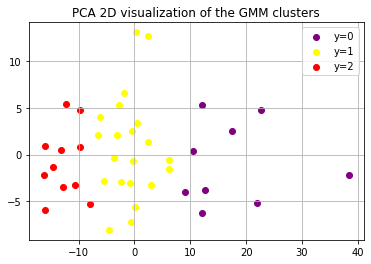

In [77]:
transformed_data = PCA(2).fit_transform(decathlon_data)
plt.figure()
plt.scatter(transformed_data[np.where(labels==0)[0],0], transformed_data[np.where(labels==0)[0],1], c='purple', label='y=0')
plt.scatter(transformed_data[np.where(labels==1)[0],0], transformed_data[np.where(labels==1)[0],1], c='yellow', label='y=1')
plt.scatter(transformed_data[np.where(labels==2)[0],0], transformed_data[np.where(labels==2)[0],1], c='red', label='y=2')
plt.grid()
plt.legend()
plt.title("PCA 2D visualization of the GMM clusters")
plt.show()